In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from lifelines import KaplanMeierFitter, CoxPHFitter

In [4]:
import csv

def tsv_to_csv(tsv_filepath, csv_filepath):
    """
    Reads a TSV file and writes its content to a CSV file.

    Args:
        tsv_filepath (str): The path to the input TSV file.
        csv_filepath (str): The path to the output CSV file.
    """
    try:
        with open(tsv_filepath, 'r') as tsvfile, open(csv_filepath, 'w', newline='') as csvfile:
            tsv_reader = csv.reader(tsvfile, delimiter='\t')
            csv_writer = csv.writer(csvfile)
            for row in tsv_reader:
                csv_writer.writerow(row)
        print(f"Successfully converted '{tsv_filepath}' to '{csv_filepath}'")
    except FileNotFoundError:
        print(f"Error: TSV file '{tsv_filepath}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage:
tsv_file = 'brca_tcga_pan_can_atlas_2018_clinical_data.tsv'
csv_file = 'data1.csv'
tsv_to_csv(tsv_file, csv_file)


Successfully converted 'brca_tcga_pan_can_atlas_2018_clinical_data.tsv' to 'data1.csv'


In [93]:
df = pd.read_csv('data1.csv')

In [6]:
df.head()

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,...,Tumor Break Load,Tissue Prospective Collection Indicator,Tissue Retrospective Collection Indicator,Tissue Source Site,Tissue Source Site Code,TMB (nonsynonymous),Tumor Disease Anatomic Site,Tumor Type,Patient Weight,Winter Hypoxia Score
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,STAGE X,6TH,19.0,-21.0,Breast Cancer,BRCA,...,205.0,No,Yes,Columbia University,3C,0.800000,Breast,Infiltrating Lobular Carcinoma,NaN,-28.0
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,TCGA-3C-AALI-01,50,STAGE IIB,6TH,22.0,5.0,Breast Cancer,BRCA,...,190.0,No,Yes,Columbia University,3C,15.266667,Breast,Infiltrating Ductal Carcinoma,NaN,20.0
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,STAGE IIB,7TH,13.0,-5.0,Breast Cancer,BRCA,...,365.0,No,Yes,Columbia University,3C,0.933333,Breast,Infiltrating Ductal Carcinoma,NaN,-10.0
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,TCGA-3C-AALK-01,52,STAGE IA,7TH,4.0,-27.0,Breast Cancer,BRCA,...,25.0,No,Yes,Columbia University,3C,1.500000,Breast,Infiltrating Ductal Carcinoma,NaN,4.0
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,STAGE IIIA,7TH,7.0,-27.0,Breast Cancer,BRCA,...,36.0,Yes,No,"Proteogenex, Inc.",4H,0.700000,Breast,Infiltrating Lobular Carcinoma,NaN,-20.0


In [7]:
df.shape

(1084, 63)

In [8]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Aneuploidy Score', 'Buffa Hypoxia Score', 'Cancer Type',
       'TCGA PanCanAtlas Cancer Type Acronym', 'Cancer Type Detailed',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status',
       'Months of disease-specific survival',
       'Disease-specific Survival status', 'Ethnicity Category',
       'Form completion date', 'Fraction Genome Altered',
       'Genetic Ancestry Label', 'Neoplasm Histologic Grade',
       'Neoadjuvant Therapy Type Administered Prior To Resection Text',
       'ICD-10 Classification',
       'International Classification of Diseases for Onc

In [94]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in dataset:\n", missing_values[missing_values > 0])

Missing values in dataset:
 Neoplasm Disease Stage American Joint Committee on Cancer Code          5
American Joint Committee on Cancer Publication Version Type           140
Aneuploidy Score                                                       43
Buffa Hypoxia Score                                                     5
Last Communication Contact from Initial Pathologic Diagnosis Date     104
Birth from Initial Pathologic Diagnosis Date                           15
Disease Free (Months)                                                 143
Disease Free Status                                                   142
Months of disease-specific survival                                     2
Disease-specific Survival status                                       20
Ethnicity Category                                                    169
Fraction Genome Altered                                                16
Genetic Ancestry Label                                                123
Neoplasm H

In [98]:

df_short = df[['Sex', 'Race Category', 'Ethnicity Category','Diagnosis Age', 'Overall Survival (Months)', 'Overall Survival Status']].copy()



In [99]:
# split  age into categories
bins = [0, 30, 40, 50, 60, 70, 80, 100]
labels = ['<30', '30-39', '40-49', '50-59', '60-69', '70-79', '80+']

df_short['Age Category'] = pd.cut(df_short['Diagnosis Age'], bins=bins, labels=labels, right=False)


df_short = df_short.dropna()
df_short.head()

,Sex,Race Category,Ethnicity Category,Diagnosis Age,Overall Survival (Months),Overall Survival Status,Age Category
0,Female,White,Not Hispanic Or Latino,55,133.050597,0:LIVING,50-59
1,Female,Black or African American,Not Hispanic Or Latino,50,131.669790,0:LIVING,50-59
2,Female,Black or African American,Not Hispanic Or Latino,62,48.459743,0:LIVING,60-69
3,Female,Black or African American,Not Hispanic Or Latino,52,47.604958,0:LIVING,50-59
4,Female,White,Not Hispanic Or Latino,50,11.440971,0:LIVING,50-59


In [100]:
df['Overall Survival Status'].value_counts()

Overall Survival Status
0:LIVING      933
1:DECEASED    151
Name: count, dtype: int64

In [101]:

df_short['Overall Survival Status'] = df_short['Overall Survival Status'].apply(lambda x: 1 if '1:DECEASED' in str(x) else 0)

df_short.head()

,Sex,Race Category,Ethnicity Category,Diagnosis Age,Overall Survival (Months),Overall Survival Status,Age Category
0,Female,White,Not Hispanic Or Latino,55,133.050597,0,50-59
1,Female,Black or African American,Not Hispanic Or Latino,50,131.669790,0,50-59
2,Female,Black or African American,Not Hispanic Or Latino,62,48.459743,0,60-69
3,Female,Black or African American,Not Hispanic Or Latino,52,47.604958,0,50-59
4,Female,White,Not Hispanic Or Latino,50,11.440971,0,50-59


/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/1999467045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df_short, palette='Set2')


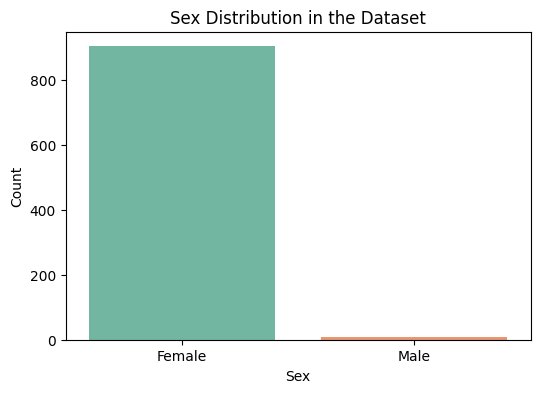

In [102]:
# Countplot for sex distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df_short, palette='Set2')
plt.title("Sex Distribution in the Dataset")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [92]:
df.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'Aneuploidy Score', 'Buffa Hypoxia Score', 'Cancer Type',
       'TCGA PanCanAtlas Cancer Type Acronym', 'Cancer Type Detailed',
       'Last Communication Contact from Initial Pathologic Diagnosis Date',
       'Birth from Initial Pathologic Diagnosis Date',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status',
       'Months of disease-specific survival',
       'Disease-specific Survival status', 'Ethnicity Category',
       'Form completion date', 'Fraction Genome Altered',
       'Genetic Ancestry Label', 'Neoplasm Histologic Grade',
       'Neoadjuvant Therapy Type Administered Prior To Resection Text',
       'ICD-10 Classification',
       'International Classification of Diseases for Onc

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/2408103571.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Category', data=df_short, palette='Set2')


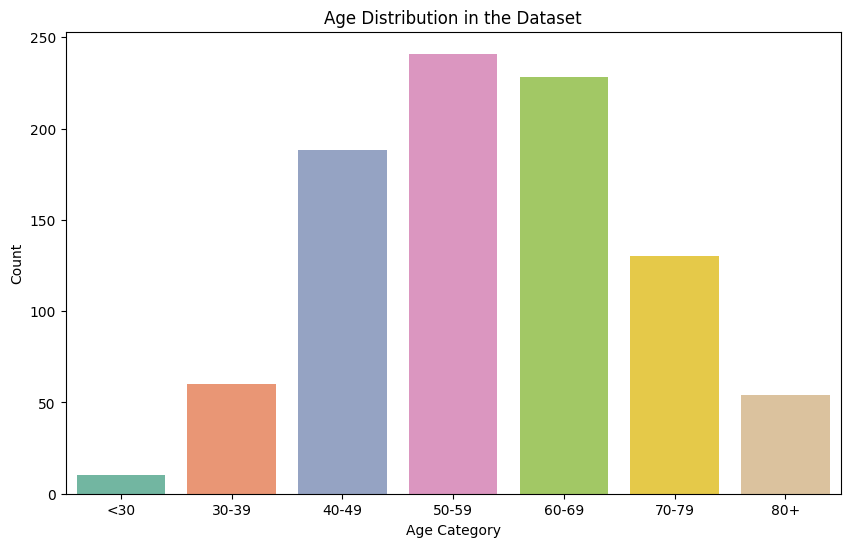

In [103]:
#countplot for age distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Age Category', data=df_short, palette='Set2')
plt.title("Age Distribution in the Dataset")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.show()  

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/376363914.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Race Category', data=df_short, palette='coolwarm')


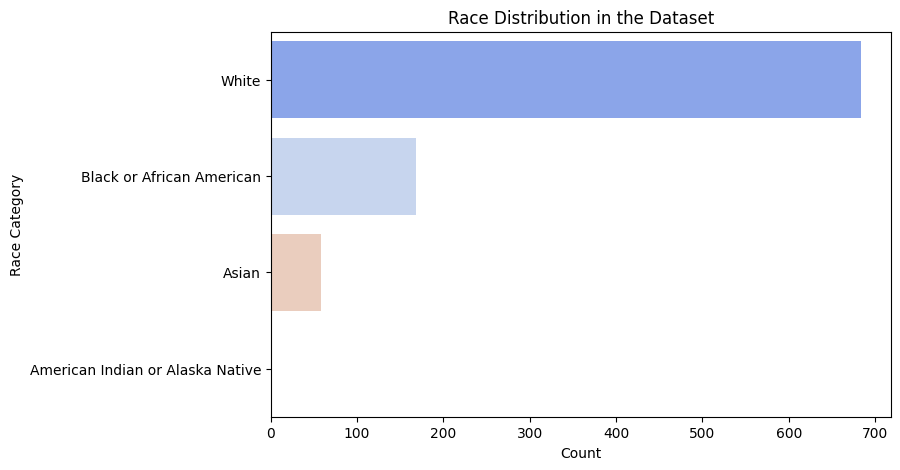

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/376363914.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Ethnicity Category', data=df_short, palette='viridis')


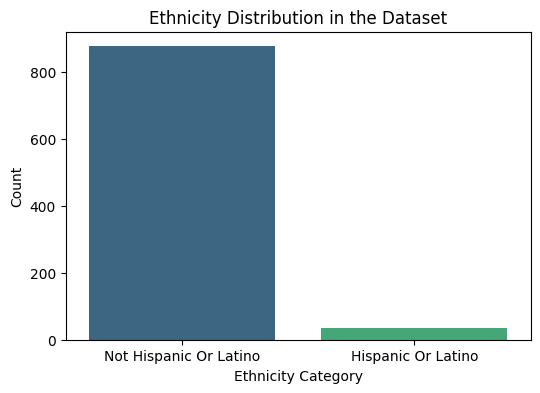

In [104]:
# Countplot for race distribution
plt.figure(figsize=(8,5))
sns.countplot(y='Race Category', data=df_short, palette='coolwarm')
plt.title("Race Distribution in the Dataset")
plt.xlabel("Count")
plt.ylabel("Race Category")
plt.show()

# Countplot for ethnicity distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Ethnicity Category', data=df_short, palette='viridis')
plt.title("Ethnicity Distribution in the Dataset")
plt.xlabel("Ethnicity Category")
plt.ylabel("Count")
plt.show()

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/2342572505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Overall Survival (Months)', data=df_short, palette='Set2')


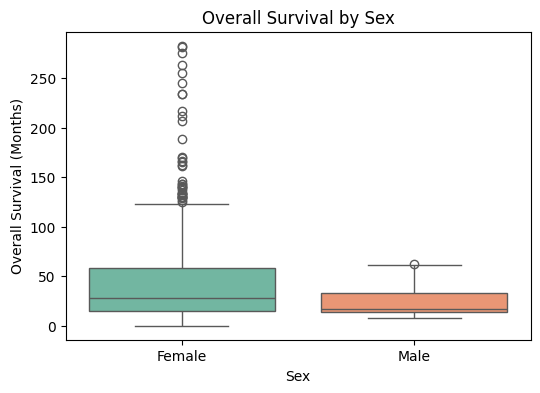

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/2342572505.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Race Category', x='Overall Survival (Months)', data=df_short, palette='coolwarm')


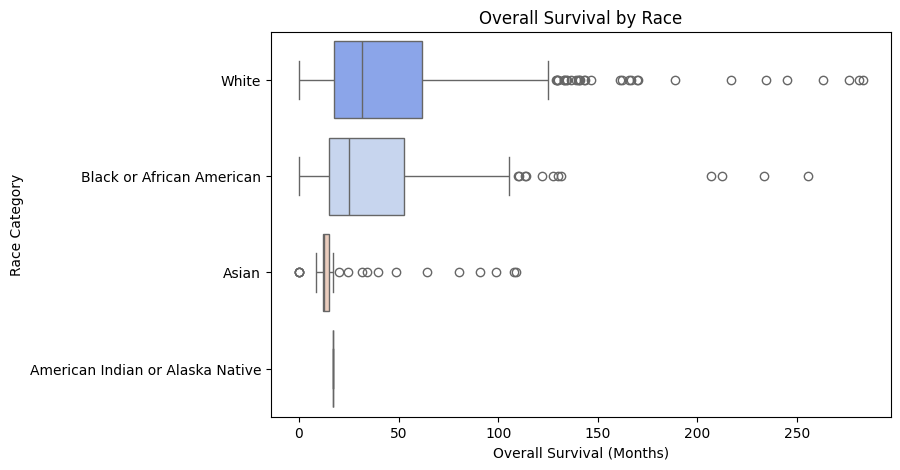

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/2342572505.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ethnicity Category', y='Overall Survival (Months)', data=df_short, palette='viridis')


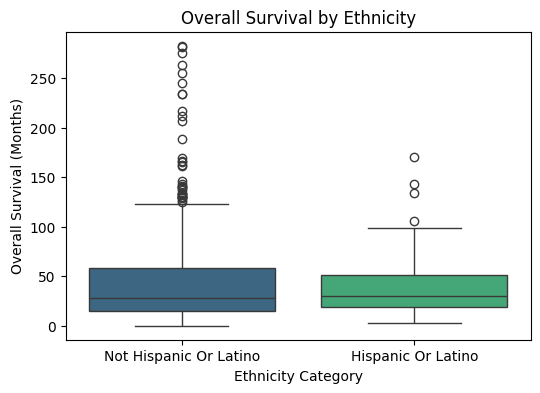

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/2342572505.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Category', y='Overall Survival (Months)', data=df_short, palette='Set2')


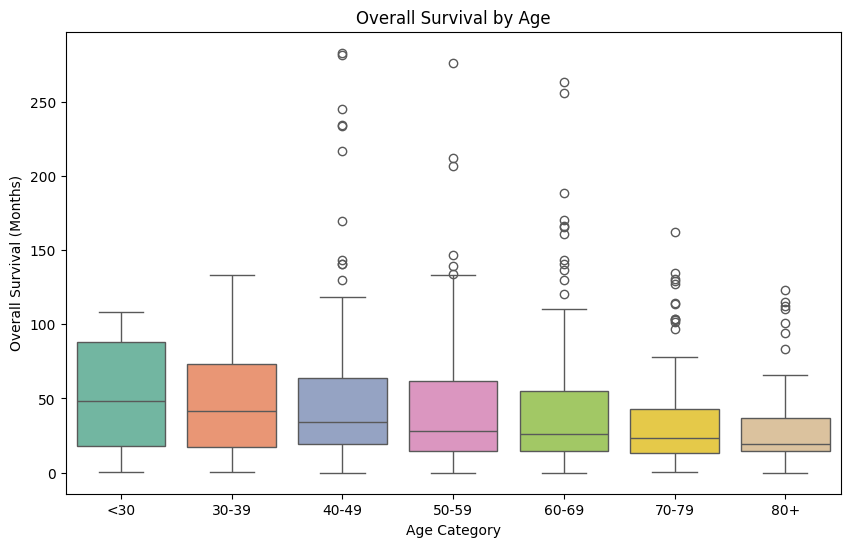

In [105]:
# Boxplot for survival months by sex
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='Overall Survival (Months)', data=df_short, palette='Set2')
plt.title("Overall Survival by Sex")
plt.show()

# Boxplot for survival months by race
plt.figure(figsize=(8,5))
sns.boxplot(y='Race Category', x='Overall Survival (Months)', data=df_short, palette='coolwarm')
plt.title("Overall Survival by Race")
plt.show()

# Boxplot for survival months by ethnicity
plt.figure(figsize=(6,4))
sns.boxplot(x='Ethnicity Category', y='Overall Survival (Months)', data=df_short, palette='viridis')
plt.title("Overall Survival by Ethnicity")
plt.show()

# Boxplot for survival months by age
plt.figure(figsize=(10,6))
sns.boxplot(x='Age Category', y='Overall Survival (Months)', data=df_short, palette='Set2')
plt.title("Overall Survival by Age")
plt.show()


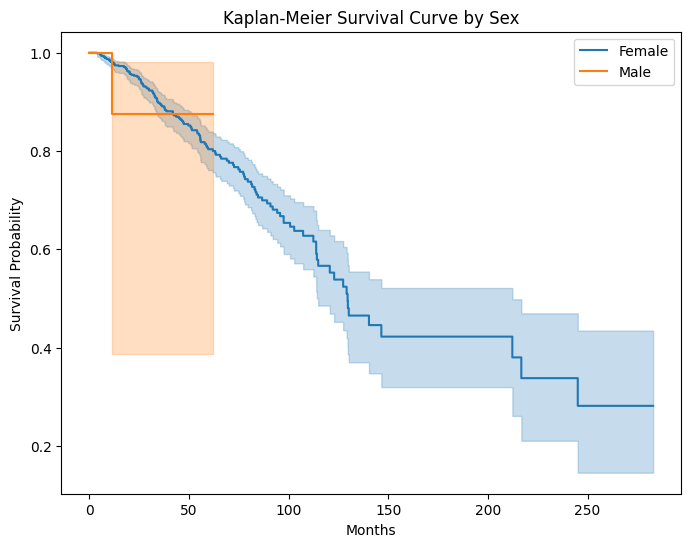

In [106]:
# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))
for sex in df_short['Sex'].unique():
    mask = df_short['Sex'] == sex
    kmf.fit(df_short['Overall Survival (Months)'][mask], df_short['Overall Survival Status'][mask], label=str(sex))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Sex")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

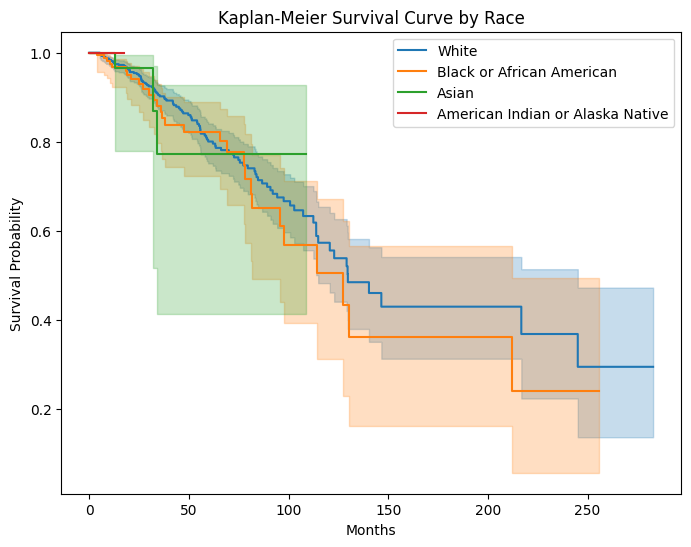

In [107]:
# Kaplan-Meier Survival Curve by Race
plt.figure(figsize=(8,6))
for race in df_short['Race Category'].unique():
    mask = df_short['Race Category'] == race
    kmf.fit(df_short['Overall Survival (Months)'][mask], df_short['Overall Survival Status'][mask], label=str(race))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Race")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

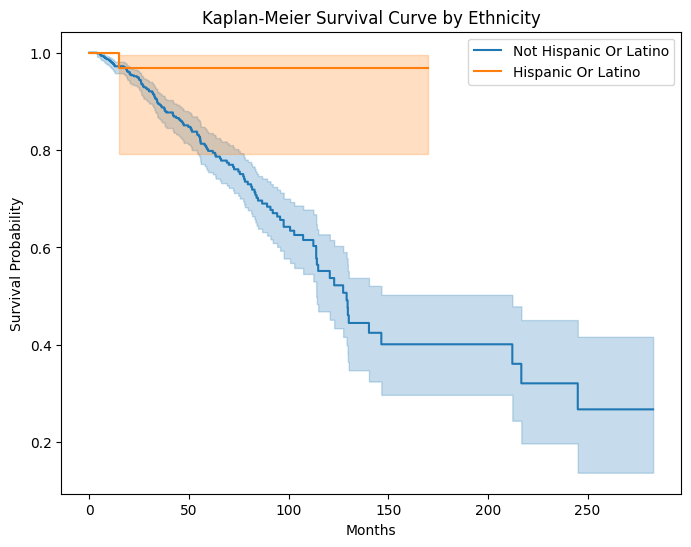

In [109]:
# Kaplan-Meier Survival Analysis by Ethnicity
kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))
for ethnicity in df_short['Ethnicity Category'].unique():
    mask = df_short['Ethnicity Category'] == ethnicity
    kmf.fit(df_short['Overall Survival (Months)'][mask], df_short['Overall Survival Status'][mask], label=str(ethnicity))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Ethnicity")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

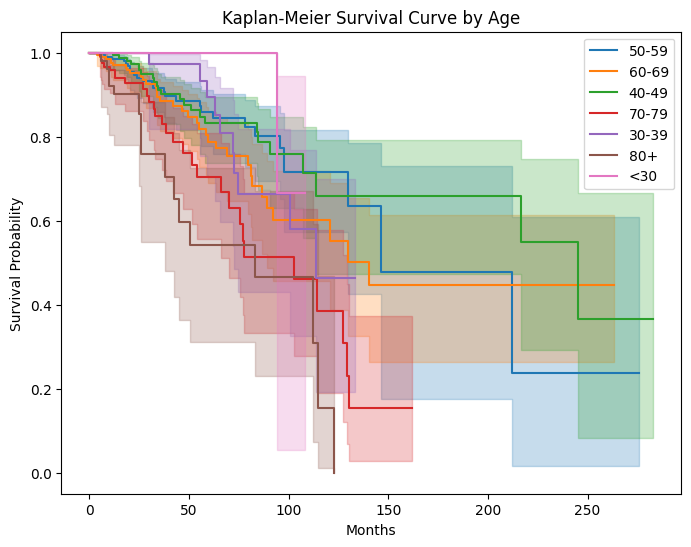

In [108]:

# Kaplan-Meier Survival Analysis by age
plt.figure(figsize=(8,6))
for age in df_short['Age Category'].unique():
    mask = df_short['Age Category'] == age
    kmf.fit(df_short['Overall Survival (Months)'][mask], df_short['Overall Survival Status'][mask], label=str(age))
    kmf.plot()
plt.title("Kaplan-Meier Survival Curve by Age")
plt.xlabel("Months")    
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


In [111]:
# ANOVA test for survival months by race
anova_race = stats.f_oneway(
    *[df_short[df_short['Race Category'] == race]['Overall Survival (Months)'] for race in df_short['Race Category'].unique()]
)
print("ANOVA test for Survival by Race:", anova_race)

# ANOVA test for survival months by age 
anova_age = stats.f_oneway(
    *[df_short[df_short['Age Category'] == age]['Overall Survival (Months)'] for age in df_short['Age Category'].unique()]
)
print("ANOVA test for Survival by Age:", anova_age)
# t test for survival months by sex
anova_sex = stats.ttest_ind(
    df_short[df_short['Sex'] == 'Male']['Overall Survival (Months)'],
    df_short[df_short['Sex'] == 'Female']['Overall Survival (Months)'],
    nan_policy='omit'
)
print("T-test for Survival by Sex:", anova_sex)



ANOVA test for Survival by Race: F_onewayResult(statistic=np.float64(5.7263600493684335), pvalue=np.float64(0.0006975061817718969))
ANOVA test for Survival by Age: F_onewayResult(statistic=np.float64(2.760587152189481), pvalue=np.float64(0.011532710724808302))
T-test for Survival by Sex: TtestResult(statistic=np.float64(-1.055879097102868), pvalue=np.float64(0.29130399815550245), df=np.float64(909.0))


<lifelines.CoxPHFitter: fitted with 911 total observations, 770 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 911
number of events observed = 141
   partial log-likelihood = -761.88
         time fit was run = 2025-02-13 12:11:48 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
Sex                 0.13      1.13      1.01           -1.86            2.11                0.16                8.24
Race Category      -0.10      0.91      0.17           -0.44            0.25                0.65                1.28
Ethnicity Category  1.87      6.48      1.01           -0.10            3.84                0.90               46.58
Diagnosis Age       0.03      1.03      0.01            0.02            0.05                1.02                1.05

                    cmp to     z      p  -log2(p)
covariate                                        
Sex                   0.00  0.12   0.90      0.15
Race Category         0.00 -0.55   0.58      0.77
Ethnicity Category    0.00  1.86   0.06      3.98
Diagnosis Age         0.00  5.13 <0.005     21.74
---
Concordance = 0.66
Partial AIC = 1531.75
log-likelihood ratio test = 33.51 on 4 df
-log2(p) of ll-ratio test = 20.02

<Axes: xlabel='log(HR) (95% CI)'>

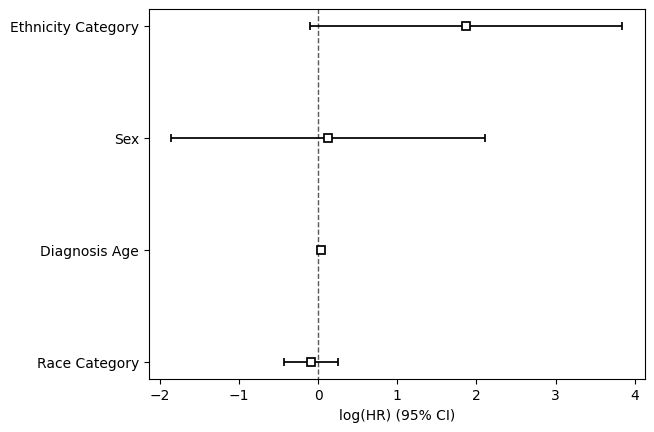

In [113]:
# Prepare data for Cox Regression
df_short['Sex'] = df_short['Sex'].astype('category').cat.codes  # Convert to numerical
df_short['Race Category'] = df_short['Race Category'].astype('category').cat.codes
df_short['Ethnicity Category'] = df_short['Ethnicity Category'].astype('category').cat.codes


# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_short[['Overall Survival (Months)', 'Overall Survival Status', 'Sex', 'Race Category', 'Ethnicity Category','Diagnosis Age']], duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Display summary
cph.print_summary()

# Plot hazard ratios
cph.plot()

In [29]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 232 kB 37.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [114]:
df_short.columns

Index(['Sex', 'Race Category', 'Ethnicity Category', 'Diagnosis Age',
       'Overall Survival (Months)', 'Overall Survival Status', 'Age Category'],
      dtype='object')

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
import statsmodels.api as sm

# Prepare the dataset
df_logit = df_short[['Overall Survival Status', 'Sex', 'Race Category', 'Ethnicity Category','Age Category']].copy()

# Convert categorical variables to numerical
df_logit['Sex'] = df_logit['Sex'].astype('category').cat.codes
df_logit['Race Category'] = df_logit['Race Category'].astype('category').cat.codes
df_logit['Ethnicity Category'] = df_logit['Ethnicity Category'].astype('category').cat.codes
df_logit['Age Category'] = df_logit['Age Category'].astype('category').cat.codes

# Define independent (X) and dependent (Y) variables
X = df_logit[['Sex', 'Race Category', 'Ethnicity Category', 'Age Category']]
y = df_logit['Overall Survival Status']

# Add constant for statsmodels logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.421362
         Iterations 8
                              Logit Regression Results                             
Dep. Variable:     Overall Survival Status   No. Observations:                  911
Model:                               Logit   Df Residuals:                      906
Method:                                MLE   Df Model:                            4
Date:                     Thu, 13 Feb 2025   Pseudo R-squ.:                 0.02214
Time:                             07:14:18   Log-Likelihood:                -383.86
converged:                            True   LL-Null:                       -392.55
Covariance Type:                 nonrobust   LLR p-value:                  0.001628
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.8475      1.152     -4.209 

In [37]:
df_short['Sex'].value_counts()

Sex
0    902
1      9
Name: count, dtype: int64

In [38]:
df_short['Race Category'].value_counts()

Race Category
3    684
2    168
1     58
0      1
Name: count, dtype: int64

In [39]:
df_short['Ethnicity Category'].value_counts()

Ethnicity Category
1    875
0     36
Name: count, dtype: int64

## balcning classes

In [40]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 258 kB 2.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [116]:
df_short.columns

Index(['Sex', 'Race Category', 'Ethnicity Category', 'Diagnosis Age',
       'Overall Survival (Months)', 'Overall Survival Status', 'Age Category'],
      dtype='object')

In [121]:
from imblearn.over_sampling import SMOTE

# Define features and target 
# 'Overall Survival (Months)', 'Overall Survival Status'
X_bal = df_short[['Sex', 'Race Category', 'Ethnicity Category','Age Category','Overall Survival (Months)']].copy()
y_bal = df_short['Overall Survival Status'].copy()

# Convert categorical variables
X_bal['Sex'] = X_bal['Sex'].astype('category').cat.codes
X_bal['Race Category'] = X_bal['Race Category'].astype('category').cat.codes
X_bal['Ethnicity Category'] = X_bal['Ethnicity Category'].astype('category').cat.codes
X_bal['Age Category'] = X_bal['Age Category'].astype('category').cat.codes

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_bal, y_bal)

# Check new class balance
print(pd.Series(y_resampled).value_counts())

Overall Survival Status
0    770
1    770
Name: count, dtype: int64


/Users/syedhumarahim/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [118]:
df['Race Category'].value_counts()

Race Category
White                               751
Black or African American           182
Asian                                60
American Indian or Alaska Native      1
Name: count, dtype: int64

In [119]:
df['Ethnicity Category'].value_counts()

Ethnicity Category
Not Hispanic Or Latino    877
Hispanic Or Latino         38
Name: count, dtype: int64

In [131]:


# Recreate the dataframe with balanced features and target
df_balanced = pd.DataFrame(X_resampled, columns=['Sex', 'Race Category', 'Ethnicity Category','Age Category','Overall Survival (Months)'])

# Add the balanced survival status column
df_balanced['Overall Survival Status'] = y_resampled

# If you had encoded categorical variables before SMOTE, map them back
sex_mapping = {0: 'Male', 1: 'Female'}
race_mapping = {0: 'White', 1: 'Black or African American', 2: 'Asian', 3: 'American Indian or Alaska Native '}
ethnicity_mapping = {0: 'Hispanic', 1: 'Not Hispanic'}
age_mapping = {0: '<30', 1: '30-39', 2: '40-49', 3: '50-59', 4: '60-69', 5: '70-79', 6: '80+'}

df_balanced['Sex'] = df_balanced['Sex'].map(sex_mapping)
df_balanced['Race Category'] = df_balanced['Race Category'].map(race_mapping)
df_balanced['Ethnicity Category'] = df_balanced['Ethnicity Category'].map(ethnicity_mapping)
df_balanced['Age Category'] = df_balanced['Age Category'].map(age_mapping)

df_balanced.head()


,Sex,Race Category,Ethnicity Category,Age Category,Overall Survival (Months),Overall Survival Status
0,Male,American Indian or Alaska Native,Not Hispanic,50-59,133.050597,0
1,Male,Asian,Not Hispanic,50-59,131.669790,0
2,Male,Asian,Not Hispanic,60-69,48.459743,0
3,Male,Asian,Not Hispanic,50-59,47.604958,0
4,Male,American Indian or Alaska Native,Not Hispanic,50-59,11.440971,0


In [125]:
# # Boxplot for survival months by sex
# plt.figure(figsize=(6,4))
# sns.boxplot(x='Sex', y='Overall Survival Status', data=df_balanced, palette='Set2')
# plt.title("Overall Survival by Sex")
# plt.show()

# # Boxplot for survival months by race
# plt.figure(figsize=(8,5))
# sns.boxplot(y='Race Category', x='Overall Survival Status', data=df_balanced, palette='coolwarm')
# plt.title("Overall Survival by Race")
# plt.show()

# # Boxplot for survival months by ethnicity
# plt.figure(figsize=(6,4))
# sns.boxplot(x='Ethnicity Category', y='Overall Survival Status', data=df_balanced, palette='viridis')
# plt.title("Overall Survival by Ethnicity")
# plt.show()

# # Boxplot for survival months by age
# plt.figure(figsize=(10,6))
# sns.boxplot(x='Age Category', y='Overall Survival Status', data=df_balanced, palette='Set2')
# plt.title("Overall Survival by Age")
# plt.show()


/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/1263521320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='Overall Survival (Months)', data=df_balanced, palette='Set2')


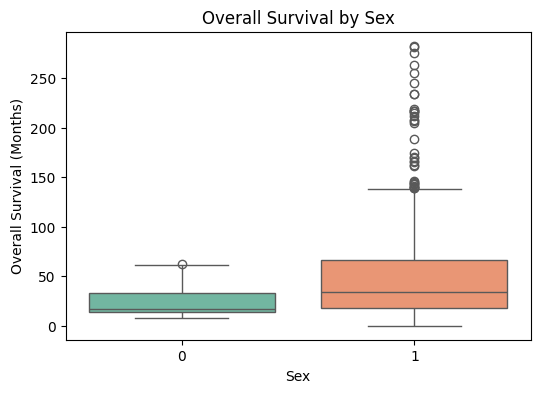

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/1263521320.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Race Category', x='Overall Survival (Months)', data=df_balanced, palette='coolwarm')


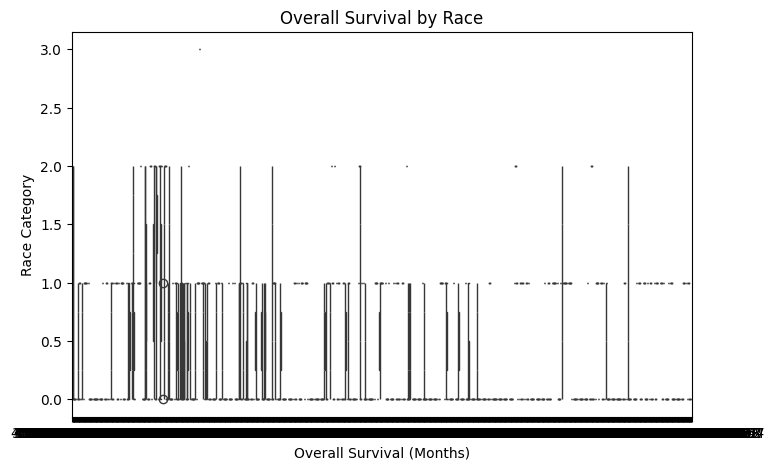

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/1263521320.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ethnicity Category', y='Overall Survival (Months)', data=df_balanced, palette='viridis')


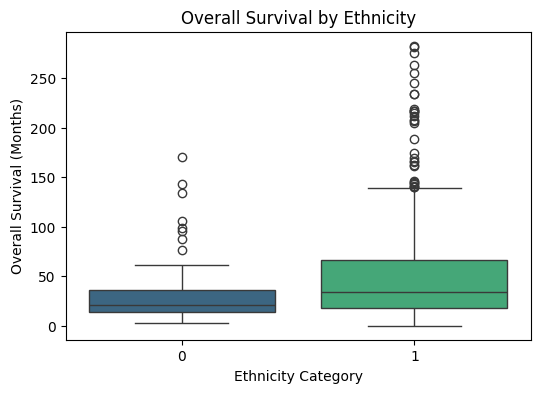

/var/folders/vv/5v8hf56x793gkbxtc4llgtdh0000gn/T/ipykernel_66174/1263521320.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age Category', y='Overall Survival (Months)', data=df_balanced, palette='Set2')


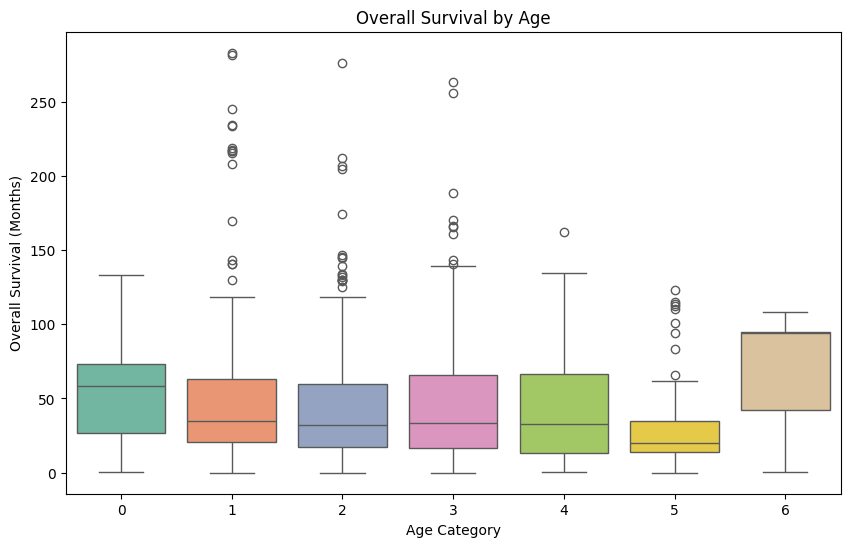

In [139]:
# Boxplot for survival months by sex
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='Overall Survival (Months)', data=df_balanced, palette='Set2')
plt.title("Overall Survival by Sex")
plt.show()

# Boxplot for survival months by race
plt.figure(figsize=(8,5))
sns.boxplot(y='Race Category', x='Overall Survival (Months)', data=df_balanced, palette='coolwarm')
plt.title("Overall Survival by Race")
plt.show()

# Boxplot for survival months by ethnicity
plt.figure(figsize=(6,4))
sns.boxplot(x='Ethnicity Category', y='Overall Survival (Months)', data=df_balanced, palette='viridis')
plt.title("Overall Survival by Ethnicity")
plt.show()

# Boxplot for survival months by age
plt.figure(figsize=(10,6))
sns.boxplot(x='Age Category', y='Overall Survival (Months)', data=df_balanced, palette='Set2')
plt.title("Overall Survival by Age")
plt.show()


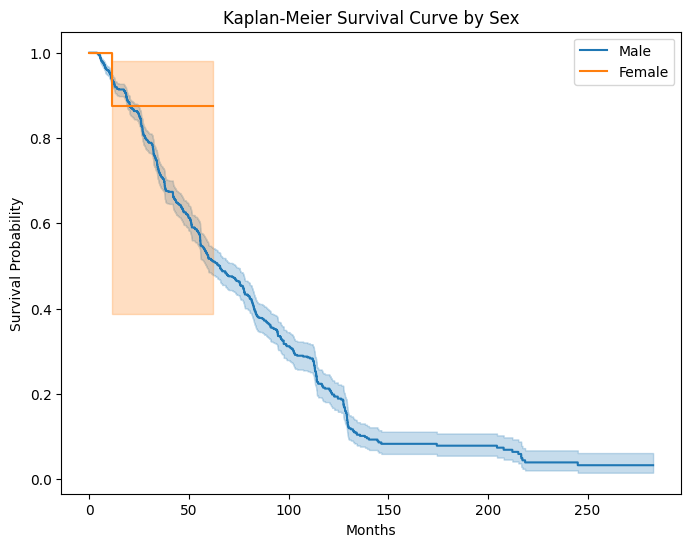

In [126]:
# Kaplan-Meier Survival Analysis
kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))
for sex in df_balanced['Sex'].unique():
    mask = df_balanced['Sex'] == sex
    kmf.fit(df_balanced['Overall Survival (Months)'][mask], df_balanced['Overall Survival Status'][mask], label=str(sex))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Sex")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

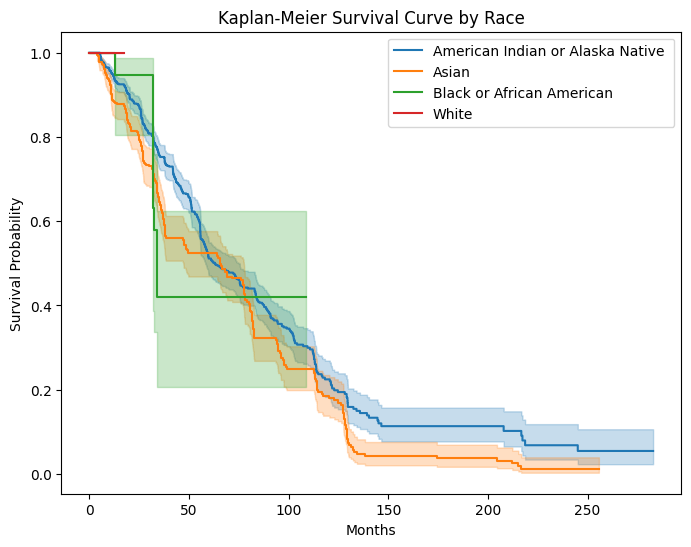

In [127]:
# Kaplan-Meier Survival Curve by Race
plt.figure(figsize=(8,6))
for race in df_balanced['Race Category'].unique():
    mask = df_balanced['Race Category'] == race
    kmf.fit(df_balanced['Overall Survival (Months)'][mask], df_balanced['Overall Survival Status'][mask], label=str(race))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Race")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

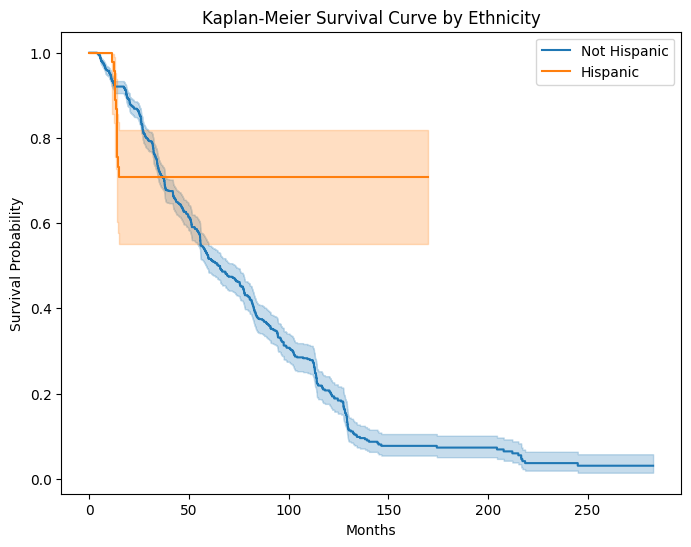

In [129]:
# Kaplan-Meier Survival Analysis by Ethnicity
kmf = KaplanMeierFitter()

plt.figure(figsize=(8,6))
for ethnicity in df_balanced['Ethnicity Category'].unique():
    mask = df_balanced['Ethnicity Category'] == ethnicity
    kmf.fit(df_balanced['Overall Survival (Months)'][mask], df_balanced['Overall Survival Status'][mask], label=str(ethnicity))
    kmf.plot()

plt.title("Kaplan-Meier Survival Curve by Ethnicity")
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


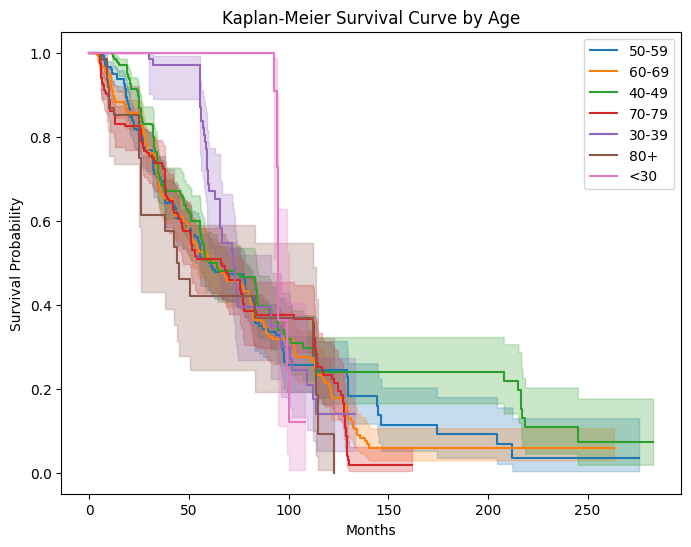

In [132]:
# Kaplan-Meier Survival Analysis by age
plt.figure(figsize=(8,6))
for age in df_balanced['Age Category'].unique():
    mask = df_balanced['Age Category'] == age
    kmf.fit(df_balanced['Overall Survival (Months)'][mask], df_balanced['Overall Survival Status'][mask], label=str(age))
    kmf.plot()
plt.title("Kaplan-Meier Survival Curve by Age")
plt.xlabel("Months")    
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

In [133]:
# ANOVA test for survival months by race
anova_race = stats.f_oneway(
    *[df_balanced[df_balanced['Race Category'] == race]['Overall Survival Status'] for race in df_balanced['Race Category'].unique()]
)
print("ANOVA test for Survival by Race:", anova_race)

# anova test for survival months by age
anova_age = stats.f_oneway(
    *[df_balanced[df_balanced['Age Category'] == age]['Overall Survival Status'] for age in df_balanced['Age Category'].unique()]
)
print("ANOVA test for Survival by Age:", anova_age)

# ANOVA test for survival months by sex
anova_sex = stats.ttest_ind(
    df_balanced[df_balanced['Sex'] == 'Male']['Overall Survival Status'],
    df_balanced[df_balanced['Sex'] == 'Female']['Overall Survival Status'],
    nan_policy='omit'
)
print("T-test for Survival by Sex:", anova_sex)



ANOVA test for Survival by Race: F_onewayResult(statistic=np.float64(29.90362302622988), pvalue=np.float64(8.673555495562583e-19))
ANOVA test for Survival by Age: F_onewayResult(statistic=np.float64(2.5047916569042132), pvalue=np.float64(0.020451676142738386))
T-test for Survival by Sex: TtestResult(statistic=np.float64(2.342830877074243), pvalue=np.float64(0.019264939125980537), df=np.float64(1538.0))


In [134]:
df_balanced.columns

Index(['Sex', 'Race Category', 'Ethnicity Category', 'Age Category',
       'Overall Survival (Months)', 'Overall Survival Status'],
      dtype='object')

<lifelines.CoxPHFitter: fitted with 1540 total observations, 770 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1540
number of events observed = 770
   partial log-likelihood = -4761.56
         time fit was run = 2025-02-13 12:35:35 UTC

---
                    coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                           
Sex                 0.78      2.17      1.00           -1.19            2.74                0.30               15.53
Race Category       0.20      1.22      0.07            0.06            0.33                1.07                1.39
Ethnicity Category  0.29      1.34      0.28           -0.26            0.84                0.77                2.33
Age Category        0.07      1.07      0.03            0.02            0.12                1.02                1.13

                    cmp to    z      p  -log2(p)
covariate                                       
Sex                   0.00 0.77   0.44      1.18
Race Category         0.00 2.91 <0.005      8.12
Ethnicity Category    0.00 1.04   0.30      1.74
Age Category          0.00 2.66   0.01      7.01
---
Concordance = 0.56
Partial AIC = 9531.12
log-likelihood ratio test = 18.58 on 4 df
-log2(p) of ll-ratio test = 10.04

<Axes: xlabel='log(HR) (95% CI)'>

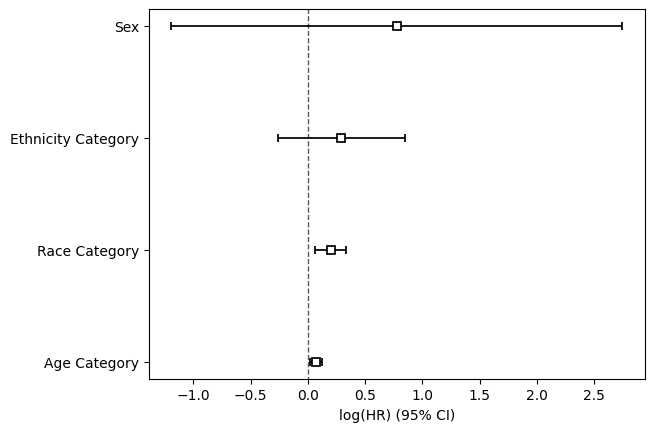

In [135]:
# Prepare data for Cox Regression
df_balanced['Sex'] = df_balanced['Sex'].astype('category').cat.codes  # Convert to numerical
df_balanced['Race Category'] = df_balanced['Race Category'].astype('category').cat.codes
df_balanced['Ethnicity Category'] = df_balanced['Ethnicity Category'].astype('category').cat.codes
df_balanced['Age Category'] = df_balanced['Age Category'].astype('category').cat.codes

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df_balanced[['Overall Survival (Months)', 'Overall Survival Status', 'Sex', 'Race Category', 'Ethnicity Category', 'Age Category']], duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

# Display summary
cph.print_summary()

# Plot hazard ratios
cph.plot()

In [136]:
df_balanced.columns

Index(['Sex', 'Race Category', 'Ethnicity Category', 'Age Category',
       'Overall Survival (Months)', 'Overall Survival Status'],
      dtype='object')

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.api import Logit
import statsmodels.api as sm

# Prepare the dataset
df_logit = df_balanced[['Overall Survival Status', 'Sex', 'Race Category', 'Ethnicity Category','Age Category']].copy()

# Convert categorical variables to numerical
df_logit['Sex'] = df_logit['Sex'].astype('category').cat.codes
df_logit['Race Category'] = df_logit['Race Category'].astype('category').cat.codes
df_logit['Ethnicity Category'] = df_logit['Ethnicity Category'].astype('category').cat.codes
df_logit['Age Category'] = df_logit['Age Category'].astype('category').cat.codes

# Define independent (X) and dependent (Y) variables
X = df_logit[['Sex', 'Race Category', 'Ethnicity Category','Age Category']]
y = df_logit['Overall Survival Status']

# Add constant for statsmodels logistic regression
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.685003
         Iterations 6
                              Logit Regression Results                             
Dep. Variable:     Overall Survival Status   No. Observations:                 1540
Model:                               Logit   Df Residuals:                     1535
Method:                                MLE   Df Model:                            4
Date:                     Thu, 13 Feb 2025   Pseudo R-squ.:                 0.01175
Time:                             07:37:07   Log-Likelihood:                -1054.9
converged:                            True   LL-Null:                       -1067.4
Covariance Type:                 nonrobust   LLR p-value:                 4.842e-05
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1504      1.111     -2.835 

poisson regression on unbalanced data 

In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare the dataset
df_poisson = df_short[['Overall Survival (Months)', 'Sex', 'Race Category', 'Ethnicity Category']].copy()

# Convert categorical variables to numerical codes
df_poisson['Sex'] = df_poisson['Sex'].astype('category').cat.codes
df_poisson['Race Category'] = df_poisson['Race Category'].astype('category').cat.codes
df_poisson['Ethnicity Category'] = df_poisson['Ethnicity Category'].astype('category').cat.codes

# Fit Poisson regression model
poisson_model = smf.poisson("Q('Overall Survival (Months)') ~ Sex + Q('Race Category') + Q('Ethnicity Category')", data=df_poisson)
poisson_results = poisson_model.fit()

# Print summary
print(poisson_results.summary())

# Extract and interpret coefficients (convert log-coefficients to incidence rate ratios)
print("\nIncidence Rate Ratios (Exp of Coefficients):\n", np.exp(poisson_results.params))

Optimization terminated successfully.
         Current function value: 18.409114
         Iterations 5
                                Poisson Regression Results                                
Dep. Variable:     Q('Overall Survival (Months)')   No. Observations:                  911
Model:                                    Poisson   Df Residuals:                      907
Method:                                       MLE   Df Model:                            3
Date:                            Tue, 11 Feb 2025   Pseudo R-squ.:                 0.01796
Time:                                    23:10:14   Log-Likelihood:                -16771.
converged:                                   True   LL-Null:                       -17077.
Covariance Type:                        nonrobust   LLR p-value:                1.261e-132
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------

poisson regression on balanced data 

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Prepare the dataset
df_poisson = df_balanced[['Overall Survival (Months)', 'Sex', 'Race Category', 'Ethnicity Category','Age Category']].copy()

# Convert categorical variables to numerical codes
df_poisson['Sex'] = df_poisson['Sex'].astype('category').cat.codes
df_poisson['Race Category'] = df_poisson['Race Category'].astype('category').cat.codes
df_poisson['Ethnicity Category'] = df_poisson['Ethnicity Category'].astype('category').cat.codes
df_poisson['Age Category'] = df_poisson['Age Category'].astype('category').cat.codes

# Fit Poisson regression model
poisson_model = smf.poisson("Q('Overall Survival (Months)') ~ Sex + Q('Race Category') + Q('Ethnicity Category') +Q('Age Category')", data=df_poisson)
poisson_results = poisson_model.fit()

# Print summary
print(poisson_results.summary())

# Extract and interpret coefficients (convert log-coefficients to incidence rate ratios)
print("\nIncidence Rate Ratios (Exp of Coefficients):\n", np.exp(poisson_results.params))

Optimization terminated successfully.
         Current function value: 18.013862
         Iterations 5
                                Poisson Regression Results                                
Dep. Variable:     Q('Overall Survival (Months)')   No. Observations:                 1540
Model:                                    Poisson   Df Residuals:                     1535
Method:                                       MLE   Df Model:                            4
Date:                            Thu, 13 Feb 2025   Pseudo R-squ.:                0.009495
Time:                                    07:38:31   Log-Likelihood:                -27741.
converged:                                   True   LL-Null:                       -28007.
Covariance Type:                        nonrobust   LLR p-value:                8.644e-114
                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------